In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
############################################################################
#                                                                          #
#                          SET PARAMETERS HERE                             #
#                                                                          #
############################################################################

############### input parameters (in data folder) ##########################
# input_folder = "all_germline_filtered_bams_tumor_ci5_cs1e9" # "all_germline_ci5_cs1e9" # "ci5_cs1e9" # "cs1e9"
input_folder = "all_germline_filtered_bams_tumor_ci5_cs1e9"
#filename =  "plotdata_unique_tumor_all_germline_singletons_excluded_tumor_4_cs_filtered.txt" # "plotdata_tumor_cs1e9_filtered.txt"
filename = "plotdata_unique_tumor_kmers_filtered.txt"

############### output parameters (in plotting_results folder) #############
#output_folder = "ci1_cs1e9" # "ci5_cs1e9" # "union_germline_ci4_cs1e9" # union_germline_filtered_tumor_bams_ci5_cs1e9
output_folder = "union_germline_filtered_tumor_bams_ci5_cs1e9"
#plot_title = "Unique_tumor_kmers" # "Tumor_kmers"
plot_title = "Unique_tumor_kmers"


paramspace <- read.csv("../data/metadata/paramspace_phaseI.csv", sep = ",")
dim(paramspace)
#output_path_unique_kmers, pt_id

[1] 15  8

In [3]:
data_all <- NULL

for (row in 1:nrow(paramspace)){
    pt = paramspace[row, "pt_id"]
    print(pt)
    fd = paramspace[row, "output_path_unique_kmers"]
    
    data <- read.table(paste("../data/", pt, "/", fd ,"/", input_folder, "/", filename, sep = ""))
    data <- data %>% mutate(patient_id = pt)
    
    cum_sum <- NULL
    for (row in 1:nrow(data)){
        if (row <= 2000){
            sub_data <- data[row:nrow(data), ]
            cum_sum <- c(cum_sum, sum(sub_data$V2))
        } else {
            cum_sum <- c(cum_sum, NA)
        }
        }

    data <- data %>% mutate(cumulative_kmers = cum_sum)
    
    data_all <- rbind(data_all, data)
    }



[1] C04689
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04816
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04837
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04849
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04873
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04874
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04886
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C04887
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C05048
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C05073
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C05084
15 Levels: C04689 C04816 C04837 C04849 C04873 C04874 C04886 C04887 ... C05703
[1] C05118
15 Levels:

In [4]:
dim(data_all)

colnames(data_all) <- c("count", "n", "patient_id", "cumulative_kmers")
head(data_all)

[1] 2724    4

count,n,patient_id,cumulative_kmers
5,179572,C04689,524409
6,109587,C04689,344837
7,70327,C04689,235250
8,47218,C04689,164923
9,33202,C04689,117705
10,23504,C04689,84503


In [5]:
data_all_1000 <- data_all %>% filter(count <= 2000)
data_all_1000$label <- NA
data_all_1000$label[which(data_all_1000$count == max(data_all_1000$count))] <- data_all_1000$patient_id[which(data_all_1000$count == max(data_all_1000$count))]


In [6]:
#data_only_500[1, "patient_id"]
data_only_250 <- data_all_1000 %>% filter(count == 250)
data_only_250
log(max(data_only_250$n))

count,n,patient_id,cumulative_kmers,label
250,2,C05234,138,NA


[1] 0.6931472

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


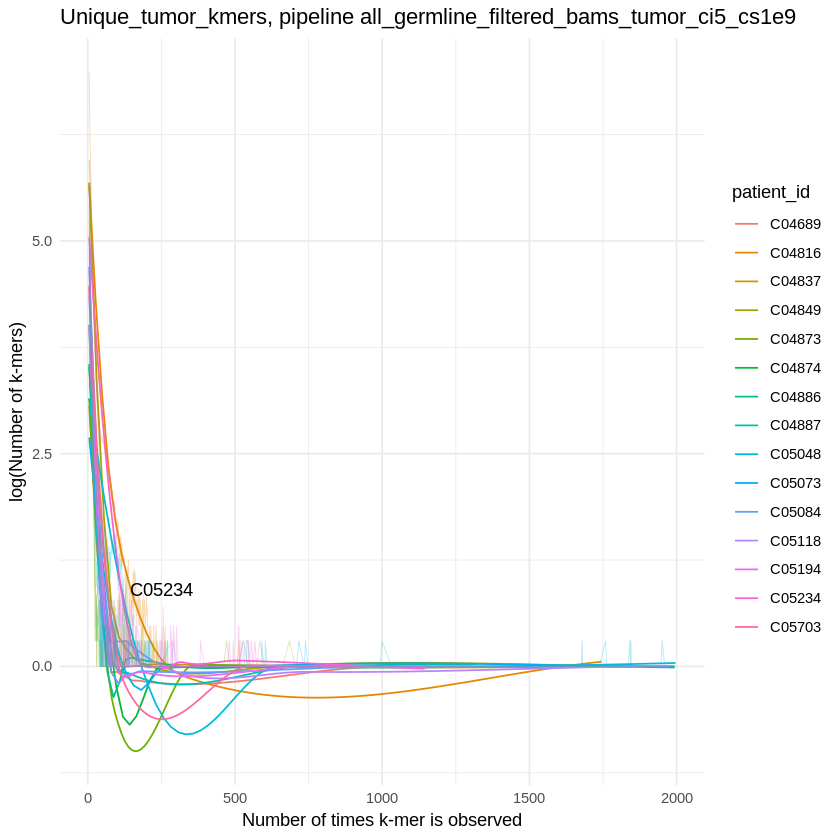

In [11]:


line_smooth <- ggplot(data_all_1000) + 
    geom_smooth(aes(count, log10(n), color = patient_id), size = 0.5, alpha = 1, se = FALSE) + 
    geom_line(aes(count, log10(n), color = patient_id), size = 0.25, alpha = 0.3) + 
    xlab("Number of times k-mer is observed") + 
    ylab("log(Number of k-mers)") + 
    theme_minimal()  + 
    annotate("text", x = 250, y = log10(max(data_only_250$n)) + 0.6, label = data_only_250$patient_id[which(data_only_250$n == max(data_only_250$n))]) +
    ggtitle(paste(plot_title, ", pipeline ", input_folder, sep =  ""))

line_smooth



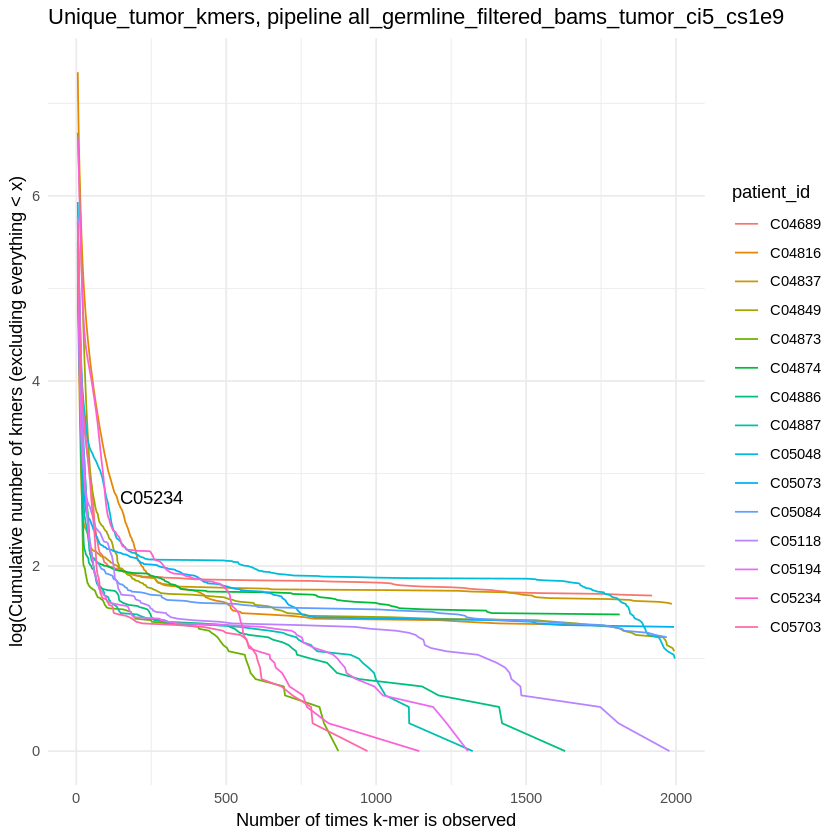

In [8]:
line_cumulative <- ggplot(data_all_1000) + 
    #geom_smooth(aes(count, log10(cumulative_kmers), color = patient_id), size = 0.5, alpha = 1, se = FALSE) + 
    geom_line(aes(count, log10(cumulative_kmers), color = patient_id), size = 0.5, alpha = 1) + 
    xlab("Number of times k-mer is observed") + 
    ylab("log(Cumulative number of kmers (excluding everything < x)") + 
    theme_minimal()  + 
    annotate("text", x = 250, y = log10(max(data_only_250$cumulative_kmers)) + 0.6, label = data_only_250$patient_id[which(data_only_250$n == max(data_only_250$n))]) +
    ggtitle(paste(plot_title, ", pipeline ", input_folder, sep =  ""))

line_cumulative

In [9]:
ggsave(
  paste("../plotting_results/", output_folder, "/kmer_distributions/", plot_title, "_count_distribution.png", sep = ""),
  line_smooth, dpi = "print")

ggsave(
  paste("../plotting_results/", output_folder, "/kmer_distributions/", plot_title, "_count_distribution_cumulative.png", sep = ""),
  line_cumulative, dpi = "print")

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 6.67 x 6.67 in image
